<a href="https://colab.research.google.com/github/SARATHKUMARTJ/TASK_7/blob/main/my_Decision_Trees_Assignment15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Social_Network_Ads.csv

**Importing the libraries**

In [2]:
import pandas as pd
import numpy as np

**Importing the dataset**

In [4]:
df=pd.read_csv("Social_Network_Ads.csv")
df. head()


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
df=df.drop("User ID",axis=1)


In [6]:
df=df.drop_duplicates()


In [7]:
df.isnull().sum()


Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [8]:
df.dtypes


Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [9]:
df.Gender=df.Gender.map({"Male":1,"Female":0})


In [10]:
df.describe()


,Gender,Age,EstimatedSalary,Purchased
count,380.000000,380.000000,380.000000,380.000000
mean,0.478947,37.586842,70421.052632,0.368421
std,0.500215,10.592492,34604.155483,0.483012
min,0.000000,18.000000,15000.000000,0.000000
25%,0.000000,29.000000,43000.000000,0.000000
50%,0.000000,37.000000,70500.000000,0.000000
75%,1.000000,46.000000,88000.000000,1.000000
max,1.000000,60.000000,150000.000000,1.000000


In [11]:
df.columns


Index(['Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

**Splitting the dataset into the Training set and Test set**

In [12]:
x=df[['Gender', 'Age', 'EstimatedSalary']].values
y=df["Purchased"].values
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

**Feature Scaling**

In [13]:
from sklearn.preprocessing import StandardScaler
scaller=StandardScaler()
scaller.fit(x_train)
x_train=scaller.transform(x_train)
x_test=scaller.transform(x_test)

**Fitting Decision Tree Classification to the Training set**

In [14]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

**Predicting the Test set results**

In [15]:
y_pred=model.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0])

**Making the Confusion Matrix**

In [16]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[40  3]
 [ 7 26]]


In [17]:

from sklearn.metrics import f1_score
print(f1_score(y_test,y_pred))

0.8387096774193549


**Visualising the Training set results**

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


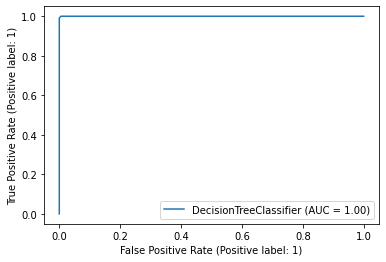

In [18]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(model,x_train,y_train);

**Visualising the Test set results**

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


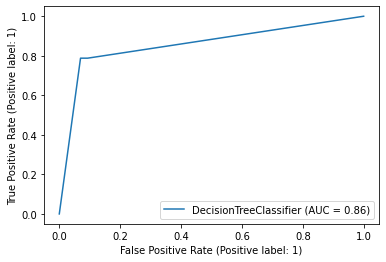

In [19]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(model,x_test,y_test)